In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import basic_nodes as nodes 

import os
import sys
utils_path = os.path.dirname(os.path.abspath(__name__)) + '/../utils/'
if utils_path not in sys.path:    
    sys.path.append(utils_path)

from LR_dataset_generator import LR_dataset_generator

plt.style.use('seaborn')
np.random.seed(0)

In [44]:

coefficient_list = [-1, 3, 4]

data_gen = LR_dataset_generator(feature_dim = 2, n_sample = 1000)
data_gen.set_coefficient(coefficient_list)
distribution_params = {0:{'mean':0, 'std':1},
                       1:{'mean':0, 'std':1}
                      }
data_gen.set_distribution_params(distribution_params)
x_data, y_data = data_gen.make_dataset()



In [45]:
feature_dim = 2
node1 = [None] + [nodes.mul_node() for _ in range(feature_dim)]
node2 = [None] + [nodes.plus_node() for _ in range(feature_dim)]
node3 = nodes.minus_node()
node4 = nodes.square_node()


# Learning
th_list = [0.1, 0.1, 0.1]

lr = 0.001
epochs = 3
th_accum = np.array(th_list).reshape(-1, 1)


loss_list = []


In [46]:
for epoch in range(epochs):
    for data_idx, (X, y) in enumerate(zip(x_data, y_data)):
        z1_list = [None] * (feature_dim + 1)
        z2_list, dz2_list, dz1_list, dth_list = z1_list.copy(), z1_list.copy(), z1_list.copy(), z1_list.copy()
        
        for node_idx in range(1, feature_dim + 1):
            z1_list[node_idx] = node1[node_idx].forward(th_list[node_idx], X[node_idx])
        
        z2_list[1] = node2[1].forward(th_list[0], z1_list[1])
        for node_idx in range(2, feature_dim + 1):
            z2_list[node_idx] = node2[node_idx].forward(z2_list[node_idx - 1], z1_list[node_idx])
        z3 = node3.forward(y, z2_list[-1])
        loss = node4.forward(z3)
        
        dz3 = node4.backward(loss)
        _, dz2_last = node3.backward(dz3)
        dz2_list[-1] = dz2_last
        
        for node_idx in reversed(range(1, feature_dim + 1)):
            dz2, dz1 = node2[node_idx].backward(dz2_list[node_idx])
            dz2_list[node_idx - 1] = dz2
            dz1_list[node_idx] = dz1
        
        dth_list[0] = dz2_list[0]
        for node_idx in reversed(range(1, feature_dim + 1)):
            dth, _ = node1[node_idx].backward(dz1_list[node_idx])
            dth_list[node_idx] = dth
        for th_idx in range(len(th_list)):
            th_list[th_idx] = th_list[th_idx] - lr*dth_list[th_idx]
        th_next = np.array(th_list).reshape(-1, 1)
        th_accum = np.hstack((th_accum, th_next))
        loss_list.append(loss)

Text(0.5, 1.0, 'Loss')

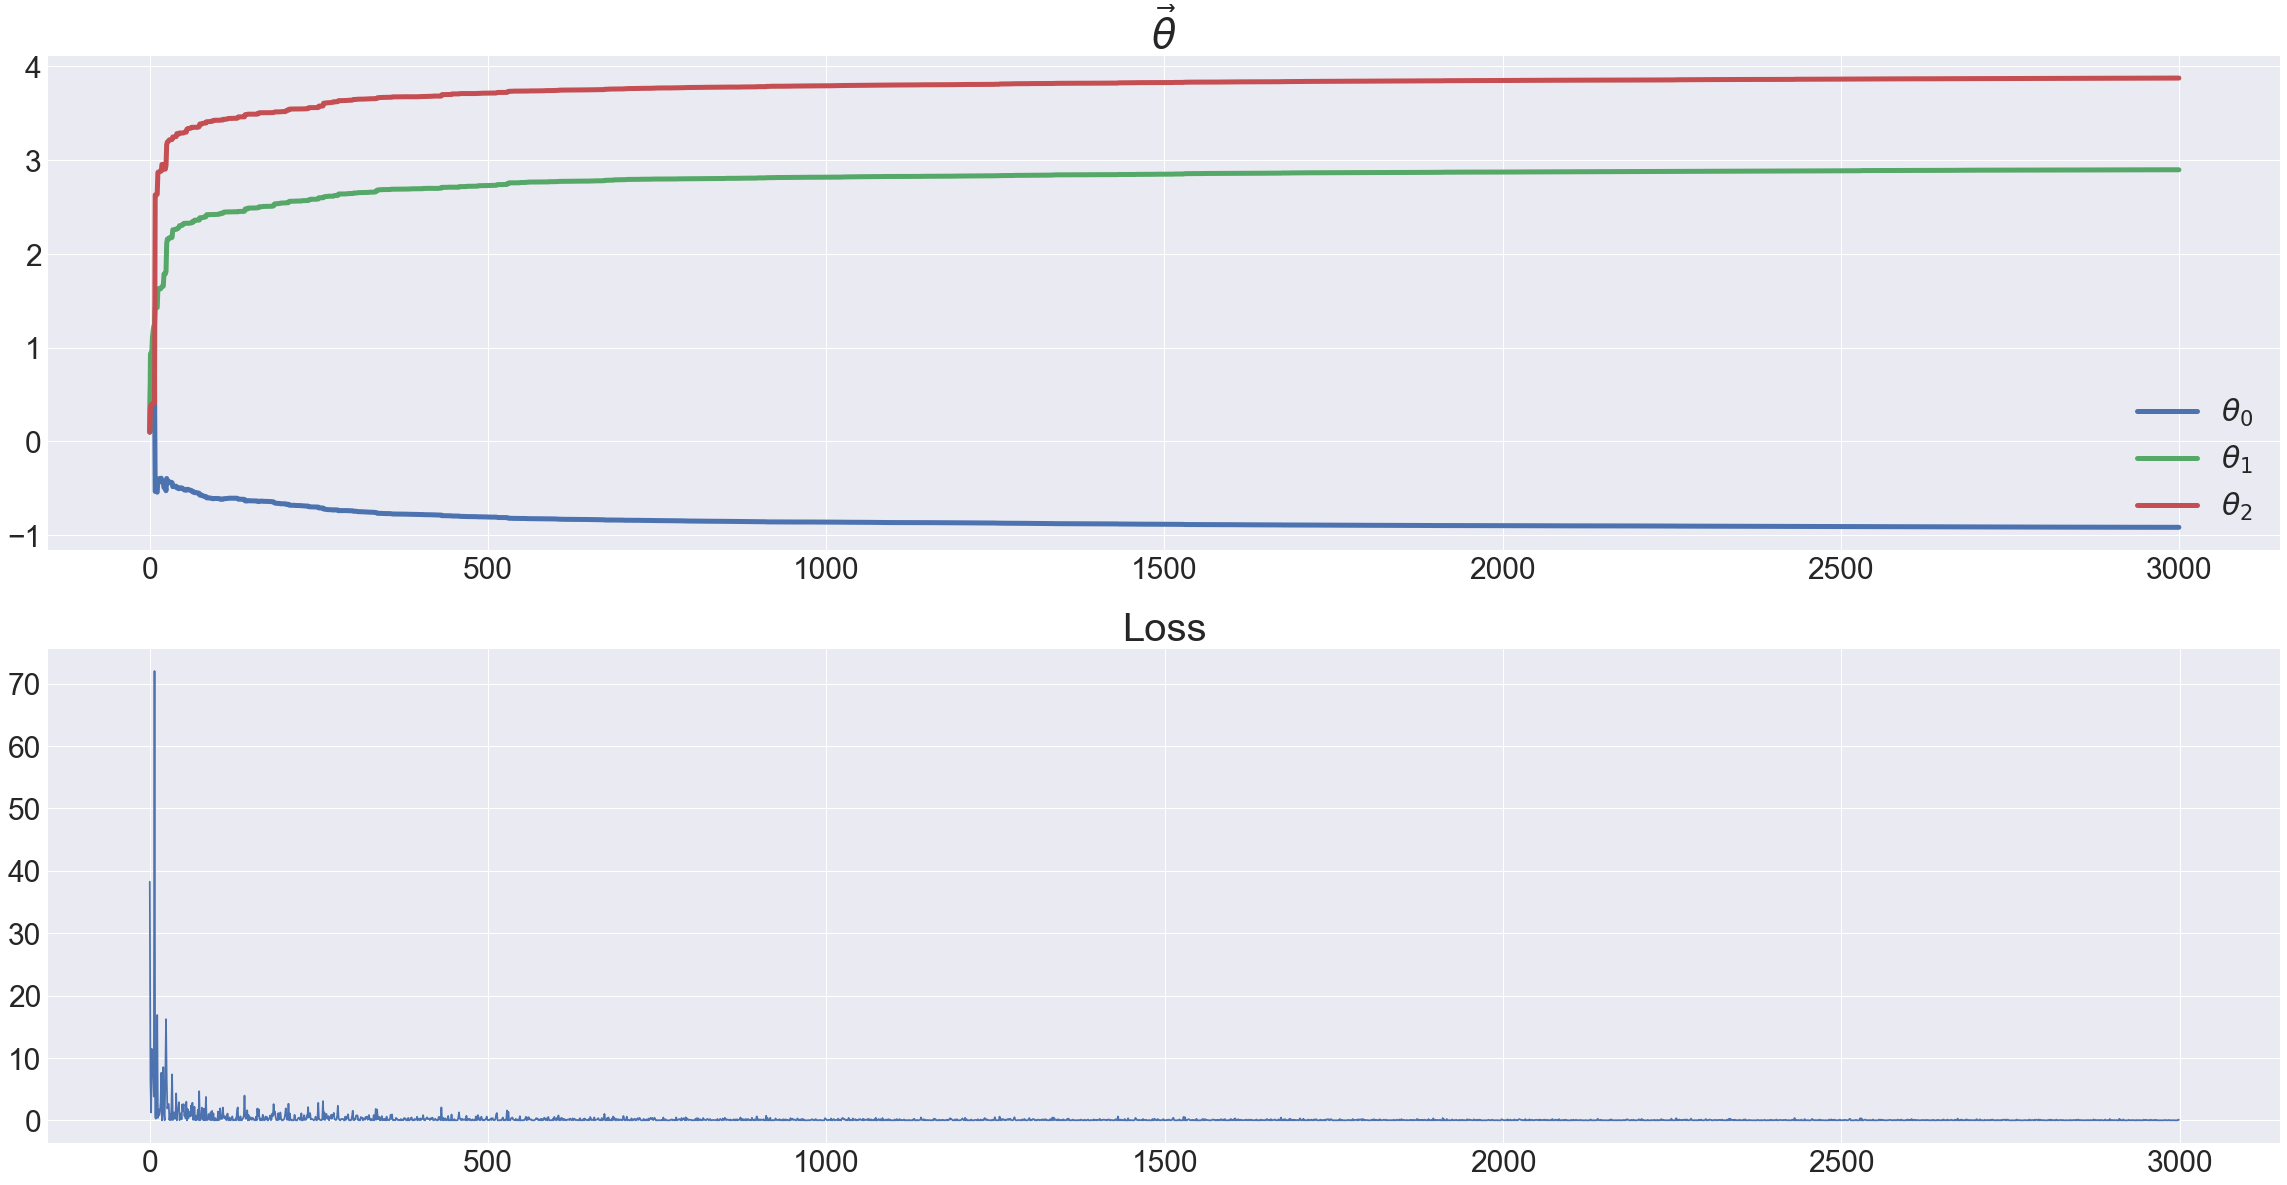

In [47]:
fig, ax = plt.subplots(2, 1, figsize = (40, 20))

for i in range(feature_dim + 1):
    ax[0].plot(th_accum[i], label = r'$\theta_{%d}$'%i,
               linewidth = 5)
ax[1].plot(loss_list)
ax[0].legend(loc = 'lower right',
            fontsize = 30)
ax[0].tick_params(axis = 'both', labelsize = 30)
ax[1].tick_params(axis = 'both', labelsize = 30)

ax[0].set_title(r'$\vec{\theta}$', fontsize = 40)
ax[1].set_title('Loss', fontsize = 40)